In [23]:
import pandas as pd
import matplotlib

donwload the dataset and put under `data`

## Load user responses

In [24]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')
print(len(data))
data.head()

1382727


,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3


In [25]:
# calc percent of correct for each question
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())

0 2812 0.44345661450924606 0.00937010933612387
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190456
3 2672 0.8087574850299402 0.007609645680958906
4 1704 0.4014084507042254 0.011878216105763999
5 833 0.1908763505402161 0.013624539924512865
6 1718 0.5285215366705471 0.012046950521125473
7 89 0.34831460674157305 0.050788279503341166
8 2327 0.3919209282337774 0.010122188032315155
9 834 0.36330935251798563 0.016664029411268603
10 1572 0.4020356234096692 0.012370345562832941
11 2171 0.45831414094887146 0.010696101386212332
12 1701 0.3991769547325103 0.011877678361556275
13 1259 0.6965845909451946 0.012961803326362887
14 1697 0.6682380671773719 0.01143315150226891
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912649
17 848 0.42924528301886794 0.017007317337094287
18 2173 0.3175333640128854 0.00998861983102292
19 2692 0.6355869242199108 0.009277428244661936
20 1707 0.6338605741066198 0.011663545946428919
21 137 0.40875912408759124 0

In [26]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<Axes: >

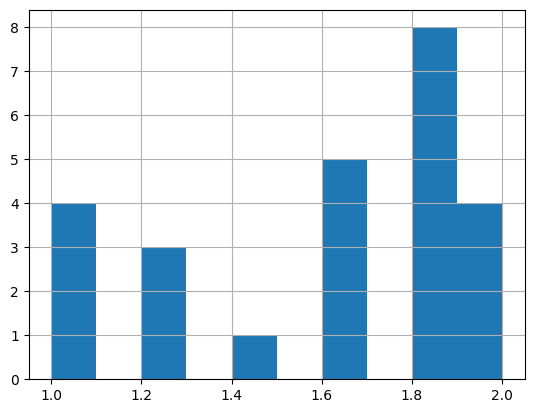

In [27]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

<Axes: >

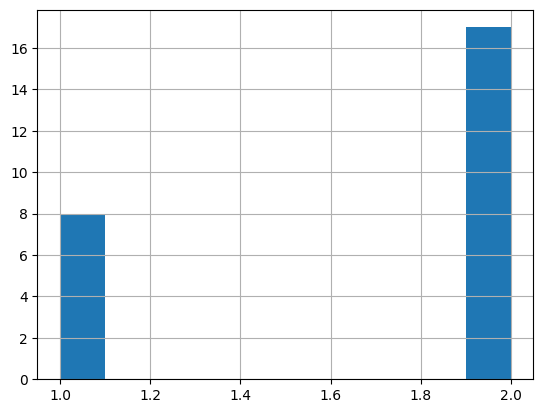

In [28]:
# decide preference
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [29]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


<Axes: >

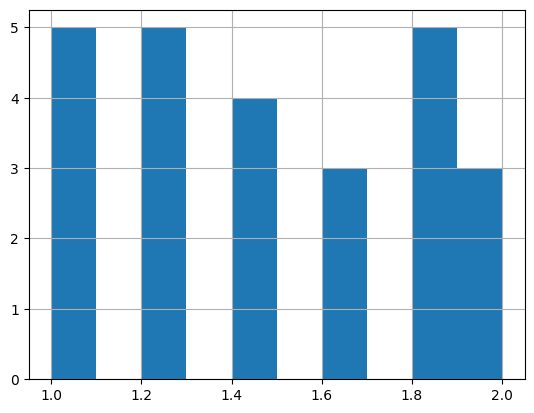

In [30]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

## Evaluate
code from https://competitions.codalab.org/forums/22145/4564/

In [33]:
template = pd.read_csv('submission/template.csv')
print(len(template))
print(template.head())
template['ranking'] = 1
template.head()

948
   QuestionId  ranking
0           0      NaN
1           1      NaN
2           2      NaN
3           3      NaN
4           4      NaN


,QuestionId,ranking
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [22]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    # truth_preference = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        # truth_preference.append(1 if ? < ? else 2)
        submission_preference.append(1 if ranking_left < ranking_right else 2)
    # print(truth_preference)
    print(submission_preference)
    
evaluate(eval_validation, template)
# evaluate(eval_test, template)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
